In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Display basic info
print("Dataset shape:", df.shape)

Dataset shape: (1470, 35)


In [6]:
# Quick statistics for numeric features
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Count target variable
print("\nAttrition distribution:")
df['Attrition'].value_counts(normalize=True)


Attrition distribution:


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [8]:
def analyze_unique_values(dataframe):
    """
    Analyze each column in the DataFrame:
    - Shows data type
    - Counts unique values
    - Displays sample unique values (up to 5)
    """
    summary = pd.DataFrame({
        "DataType": dataframe.dtypes,                 # shows the data type (int64, object, etc.)
        "UniqueCount": dataframe.nunique(),           # counts how many unique values each column has
        "SampleValues": dataframe.apply(lambda x: x.unique()[:5])  # displays first 5 unique values per column
    })
    return summary


In [9]:
unique_summary = analyze_unique_values(df)
unique_summary

,DataType,UniqueCount,SampleValues
Age,int64,43,"[41, 49, 37, 33, 27]"
Attrition,object,2,"[Yes, No]"
BusinessTravel,object,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,886,"[1102, 279, 1373, 1392, 591]"
Department,object,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,29,"[1, 8, 2, 3, 24]"
Education,int64,5,"[2, 1, 4, 3, 5]"
EducationField,object,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,1,[1]
EmployeeNumber,int64,1470,"[1, 2, 4, 5, 7]"


In [10]:
def classify_columns(df):
    """
    Classify columns into numeric, ordinal, and categorical,
    and suggest encoding strategies automatically.
    """

    drop_cols = ['EmployeeCount','Attrition','StandardHours', 'Over18', 'EmployeeNumber']
    df = df.drop(columns=drop_cols, errors='ignore')

    ordinal_cols = [
        'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
        'JobLevel', 'JobSatisfaction', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
    ]

    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    num_cols = [c for c in num_cols if c not in ordinal_cols]

    encoding_plan = {}
    for col in cat_cols:
        unique_vals = df[col].nunique()

        if unique_vals <= 2:
            encoding_plan[col] = "LabelEncoder"
        else:
            encoding_plan[col] = "OneHotEncoder"

    summary = {
        "drop_cols": drop_cols,
        "ordinal_cols": ordinal_cols,
        "categorical_cols": cat_cols,
        "numeric_cols": num_cols,
        "encoding_plan": encoding_plan
    }

    return summary


In [11]:
column_summary = classify_columns(df)
for key, value in column_summary.items():
    print(f"\n{key.upper()}:\n{value}")



DROP_COLS:
['EmployeeCount', 'Attrition', 'StandardHours', 'Over18', 'EmployeeNumber']

ORDINAL_COLS:
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

CATEGORICAL_COLS:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

NUMERIC_COLS:
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

ENCODING_PLAN:
{'BusinessTravel': 'OneHotEncoder', 'Department': 'OneHotEncoder', 'EducationField': 'OneHotEncoder', 'Gender': 'LabelEncoder', 'JobRole': 'OneHotEncoder', 'MaritalStatus': 'OneHotEncoder', 'OverTime': 'LabelEncoder'}


In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:

def build_preprocessing_pipeline(df, column_summary):
    """
    Builds a preprocessing pipeline that:
    - Drops irrelevant columns
    - Applies LabelEncoder for binary categorical variables
    - Applies OneHotEncoder for multi-category variables
    - Keeps ordinal columns as is (already encoded)
    - Scales numeric columns using StandardScaler
    """
    drop_cols = column_summary['drop_cols']
    ordinal_cols = column_summary['ordinal_cols']
    numeric_cols = column_summary['numeric_cols']
    cat_cols = column_summary['categorical_cols']
    encoding_plan = column_summary['encoding_plan']

    label_encoded_df = df.copy()
    for col, encoder_type in encoding_plan.items():
        if encoder_type == "LabelEncoder":
            le = LabelEncoder()
            label_encoded_df[col] = le.fit_transform(label_encoded_df[col])


    onehot_cols = [col for col, enc in encoding_plan.items() if enc == "OneHotEncoder"]

    transformers = []

    if onehot_cols:
        transformers.append(
            ("onehot", OneHotEncoder(drop='first', sparse_output=False), onehot_cols)
        )

    if numeric_cols:
        transformers.append(
            ("scaler", StandardScaler(), numeric_cols)
        )
    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder='passthrough'  # keep other columns (like ordinal + label-encoded)
    )
    
    df_cleaned = label_encoded_df.drop(columns=drop_cols, errors='ignore')
    processed_data = preprocessor.fit_transform(df_cleaned)

    feature_names = []
    if onehot_cols:
        ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
        feature_names.extend(ohe_feature_names)
    feature_names.extend(numeric_cols + ordinal_cols)

    binary_cols = [col for col, enc in encoding_plan.items() if enc == "LabelEncoder"]
    feature_names.extend(binary_cols)

    processed_df = pd.DataFrame(processed_data, columns=feature_names)

    return processed_df, preprocessor


In [14]:
# Drop the target column before passing df into the pipeline
features_df = df.drop(columns=["Attrition"])

processed_df, preprocessor = build_preprocessing_pipeline(features_df, column_summary)

print("Transformed data shape:", processed_df.shape)
display(processed_df.head())


Transformed data shape: (1470, 44)


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,...,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Gender,OverTime
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,3.0,2.0,4.0,1.0,3.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,2.0,2.0,0.0,4.0,4.0,1.0,3.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0,0.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,1.0,3.0,1.0,3.0,3.0,0.0,3.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,3.0,1.0,2.0,0.0,3.0,4.0,1.0,3.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure target alignment
processed_df = processed_df.reset_index(drop=True)


In [16]:
y = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0).reset_index(drop=True)

# Drop target column if it exists in the processed data
X = processed_df.drop(columns=["Attrition"], errors='ignore')

In [17]:


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



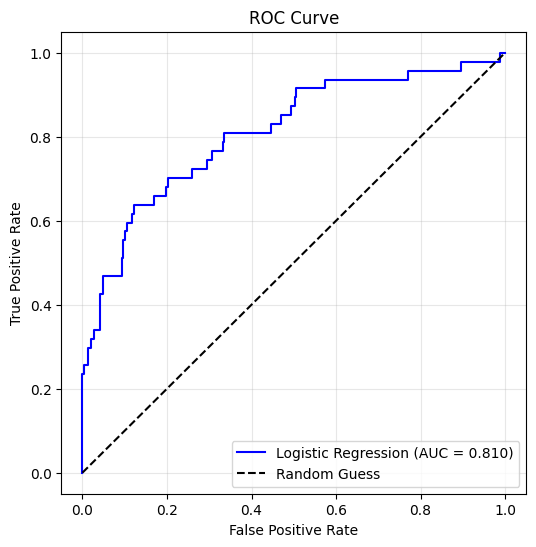

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for the positive class (Attrition = 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve points
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Step 3: Compute AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Step 4: Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
